In [1]:
import pyvista as pv
import os, random
import numpy as np
import miniball
import matplotlib.pyplot as plt

In [115]:
# Load single stl file
stl_dir = '/glade/derecho/scratch/joko/synth-ros/n1000-test-20250226/stl'
id = random.randint(1, 69999)
id = f'{id:06d}'
filename = f'ros-test-{id}.stl'
mesh1 = pv.read(os.path.join(stl_dir, filename))

In [116]:
# set base output directory
output_base = '/glade/derecho/scratch/joko/synth-ros/test-stereo-projections'

# 2D-S

- orthogonal (90 deg) between two views
- source: https://www.arm.gov/publications/tech_reports/handbooks/doe-sc-arm-tr-233.pdf

In [123]:
# get randome stereo views of crystal
print(f'processing {filename}')
theta = 90 # angle between two views
proj_id = 1 # projection id
res=128
bg_color='black'
obj_color='white'
op=1.0
def random_rotate(mesh):
    """
    Rotate rosette in a random orientation
    TODO:
    - fix bug related to the reliance on model attribute
    """
    rotated = mesh.copy()
    deg_x = np.random.randint(1, 360)
    deg_y = np.random.randint(1, 360)
    deg_z = np.random.randint(1, 360)
    rotated_model = rotated.rotate_x(deg_x, inplace=False)
    rotated_model.rotate_y(deg_y, inplace=True)
    rotated_model.rotate_z(deg_z, inplace=True)
    return rotated_model
# Rotate randomly N times
N = 10
for i in range(N):
    print(f'-> random rotation {proj_id}')
    # first, randomly rotate 
    mesh2 = random_rotate(mesh1)
    # second, rotate theta degrees, about some set axis (z-axis)
    axis = np.array([0, 0, 1])  # Example: rotation around the diagonal of XY-plane
    theta = 90  # Rotate theta degrees
    mesh3 = mesh2.rotate_vector(axis, theta, point=(0, 0, 0))  # Rotate about the origin
    # save stereo projections
    save_dir = os.path.join(output_base, '2ds')
    view1_filename = f'ros-proj-{id}-{proj_id:03d}-1.png'
    view1_path = os.path.join(save_dir, view1_filename)                          
    view2_filename = f'ros-proj-{id}-{proj_id:03d}-2.png'
    view2_path = os.path.join(save_dir, view2_filename)
    pl1 = pv.Plotter(off_screen=True, window_size=[res, res])
    pl1.background_color = bg_color
    pl1.enable_parallel_projection()
    pl1.remove_all_lights()
    pl1.add_mesh(mesh2, show_edges=None, color = obj_color, opacity=op, name='mesh')
    pl1.screenshot(view1_path, return_img=False)
    pl2 = pv.Plotter(off_screen=True, window_size=[res, res])
    pl2.background_color = bg_color
    pl2.enable_parallel_projection()
    pl2.remove_all_lights()
    pl2.add_mesh(mesh3, show_edges=None, color = obj_color, opacity=op, name='mesh')
    pl2.screenshot(view2_path, return_img=False)
    proj_id += 1

processing ros-test-023938.stl
-> random rotation 1
-> random rotation 2
-> random rotation 3
-> random rotation 4
-> random rotation 5
-> random rotation 6
-> random rotation 7
-> random rotation 8
-> random rotation 9
-> random rotation 10


# PHIPS-HALO

- 120 deg between two views
- source: https://amt.copernicus.org/articles/14/3049/2021/

In [127]:
# get randome stereo views of crystal
print(f'processing {filename}')
theta = 120 # angle between two views
proj_id = 1 # projection id
res=128
bg_color='black'
obj_color='white'
op=1.0
def random_rotate(mesh):
    """
    Rotate rosette in a random orientation
    TODO:
    - fix bug related to the reliance on model attribute
    """
    rotated = mesh.copy()
    deg_x = np.random.randint(1, 360)
    deg_y = np.random.randint(1, 360)
    deg_z = np.random.randint(1, 360)
    rotated_model = rotated.rotate_x(deg_x, inplace=False)
    rotated_model.rotate_y(deg_y, inplace=True)
    rotated_model.rotate_z(deg_z, inplace=True)
    return rotated_model
# Rotate randomly N times
N = 10
for i in range(N):
    print(f'-> random rotation {proj_id}')
    # first, randomly rotate 
    mesh2 = random_rotate(mesh1)
    # second, rotate theta degrees, about some set axis (z-axis)
    axis = np.array([0, 0, 1])  # Example: rotation around the diagonal of XY-plane
    mesh3 = mesh2.rotate_vector(axis, theta, point=(0, 0, 0))  # Rotate about the origin
    # save stereo projections
    save_dir = os.path.join(output_base, 'phips')
    view1_filename = f'ros-proj-{id}-{proj_id:03d}-1.png'
    view1_path = os.path.join(save_dir, view1_filename)                          
    view2_filename = f'ros-proj-{id}-{proj_id:03d}-2.png'
    view2_path = os.path.join(save_dir, view2_filename)
    pl1 = pv.Plotter(off_screen=True, window_size=[res, res])
    pl1.background_color = bg_color
    pl1.enable_parallel_projection()
    pl1.remove_all_lights()
    pl1.add_mesh(mesh2, show_edges=None, color = obj_color, opacity=op, name='mesh')
    pl1.screenshot(view1_path, return_img=False)
    pl2 = pv.Plotter(off_screen=True, window_size=[res, res])
    pl2.background_color = bg_color
    pl2.enable_parallel_projection()
    pl2.remove_all_lights()
    pl2.add_mesh(mesh3, show_edges=None, color = obj_color, opacity=op, name='mesh')
    pl2.screenshot(view2_path, return_img=False)
    proj_id += 1

processing ros-test-023938.stl
-> random rotation 1
-> random rotation 2
-> random rotation 3
-> random rotation 4
-> random rotation 5
-> random rotation 6
-> random rotation 7
-> random rotation 8
-> random rotation 9
-> random rotation 10


# Scratch

In [64]:
# Load single stl file
stl_dir = '/glade/derecho/scratch/joko/synth-ros/n1000-test-20250226/stl'
id = random.randint(1, 69999)
id = f'{id:06d}'
filename = f'ros-test-{id}.stl'
mesh = pv.read(os.path.join(stl_dir, filename))
# mesh = pv.Cube()
pl = pv.Plotter(off_screen=True)  # Off-screen rendering
pl.add_mesh(mesh, color="lightblue", show_edges=False)
pl.camera_position = 'xy'  # Set static camera view
pl.add_axes()
origin = [0, 0, 0]  # The origin (0, 0, 0)
# # Create arrows along the X, Y, and Z axes
# x_arrow = pv.Arrow(start=origin, direction=(1, 0, 0), scale=2)  # X axis, scaled by 2
# y_arrow = pv.Arrow(start=origin, direction=(0, 1, 0), scale=2)  # Y axis, scaled by 2
# z_arrow = pv.Arrow(start=origin, direction=(0, 0, 1), scale=2)  # Z axis, scaled by 2
# # Add arrows (axis vectors) to the plot with different colors
# pl.add_mesh(x_arrow, color="red", label="X-axis")
# pl.add_mesh(y_arrow, color="green", label="Y-axis")
# pl.add_mesh(z_arrow, color="blue", label="Z-axis")
# pl.show(jupyter_backend='static')
camera = pl.camera
print("Camera Position:", camera.position)
print("Camera Focal Point:", camera.focal_point)
print("Camera Elevation:", camera.elevation)
print("Camera Azimuth:", camera.azimuth)
pl.render()
pl.screenshot('view-default-1.png', return_img=False)

Camera Position: (95.82309341430664, -57.55024719238281, 1201.1071411676937)
Camera Focal Point: (95.82309341430664, -57.55024719238281, -38.33238220214844)
Camera Elevation: 0.0
Camera Azimuth: 0.0


In [65]:
pl.camera.azimuth = 90.0
# pl.show(jupyter_backend='static')
camera = pl.camera
print("Camera Position:", camera.position)
print("Camera Focal Point:", camera.focal_point)
print("Camera Elevation:", camera.elevation)
print("Camera Azimuth:", camera.azimuth)
pl.render()
pl.screenshot('view-90.png', return_img=False)

Camera Position: (1335.2626167841488, -57.55024719238281, -38.33238220214815)
Camera Focal Point: (95.82309341430664, -57.55024719238281, -38.33238220214844)
Camera Elevation: 0.0
Camera Azimuth: 90.0


In [66]:
pl.reset_camera()
pl.camera_position = 'xy'  # Set static camera view
camera = pl.camera
# pl.show(jupyter_backend='static')
print("Camera Position:", camera.position)
print("Camera Focal Point:", camera.focal_point)
print("Camera Elevation:", camera.elevation)
print("Camera Azimuth:", camera.azimuth)
pl.screenshot('view-default-2.png', return_img=False)

Camera Position: (95.82309341430664, -57.55024719238281, 1201.1071411676937)
Camera Focal Point: (95.82309341430664, -57.55024719238281, -38.33238220214844)
Camera Elevation: 0.0
Camera Azimuth: 0.0


In [67]:
pl.camera.azimuth = 120.0
# pl.show(jupyter_backend='static')
camera = pl.camera
print("Camera Position:", camera.position)
print("Camera Focal Point:", camera.focal_point)
print("Camera Elevation:", camera.elevation)
print("Camera Azimuth:", camera.azimuth)
pl.render()
pl.screenshot('view-120.png', return_img=False)

Camera Position: (1169.2092071070665, -57.55024719238281, -658.0521438870693)
Camera Focal Point: (95.82309341430664, -57.55024719238281, -38.33238220214844)
Camera Elevation: 0.0
Camera Azimuth: 120.0


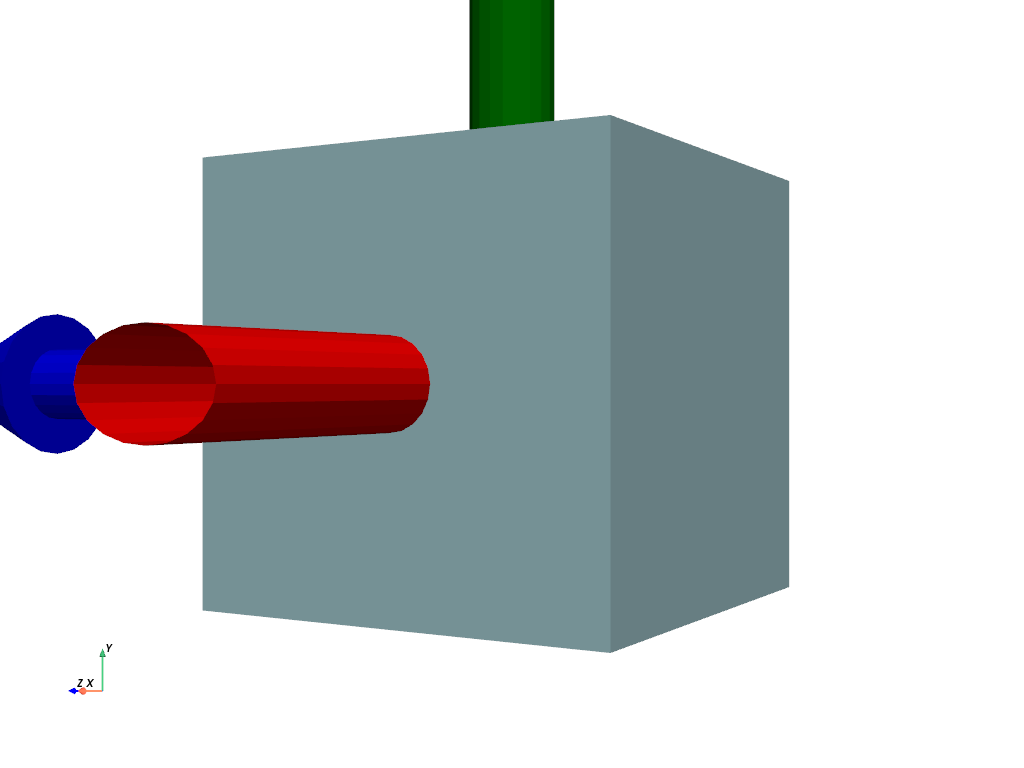

In [17]:
mesh = pv.Cube()
pl = pv.Plotter(off_screen=True)  # Off-screen rendering
pl.add_mesh(mesh, color="lightblue", show_edges=False)
pl.camera_position = 'xy'  # Set static camera view
pl.add_axes()
origin = [0, 0, 0]  # The origin (0, 0, 0)
pl.camera.azimuth = 120.0
# Create arrows along the X, Y, and Z axes
x_arrow = pv.Arrow(start=origin, direction=(1, 0, 0), scale=2)  # X axis, scaled by 2
y_arrow = pv.Arrow(start=origin, direction=(0, 1, 0), scale=2)  # Y axis, scaled by 2
z_arrow = pv.Arrow(start=origin, direction=(0, 0, 1), scale=2)  # Z axis, scaled by 2
# Add arrows (axis vectors) to the plot with different colors
pl.add_mesh(x_arrow, color="red", label="X-axis")
pl.add_mesh(y_arrow, color="green", label="Y-axis")
pl.add_mesh(z_arrow, color="blue", label="Z-axis")
pl.show(jupyter_backend='static')

In [13]:
pl.camera.azimuth
pl.camera.azimuth = 90.0

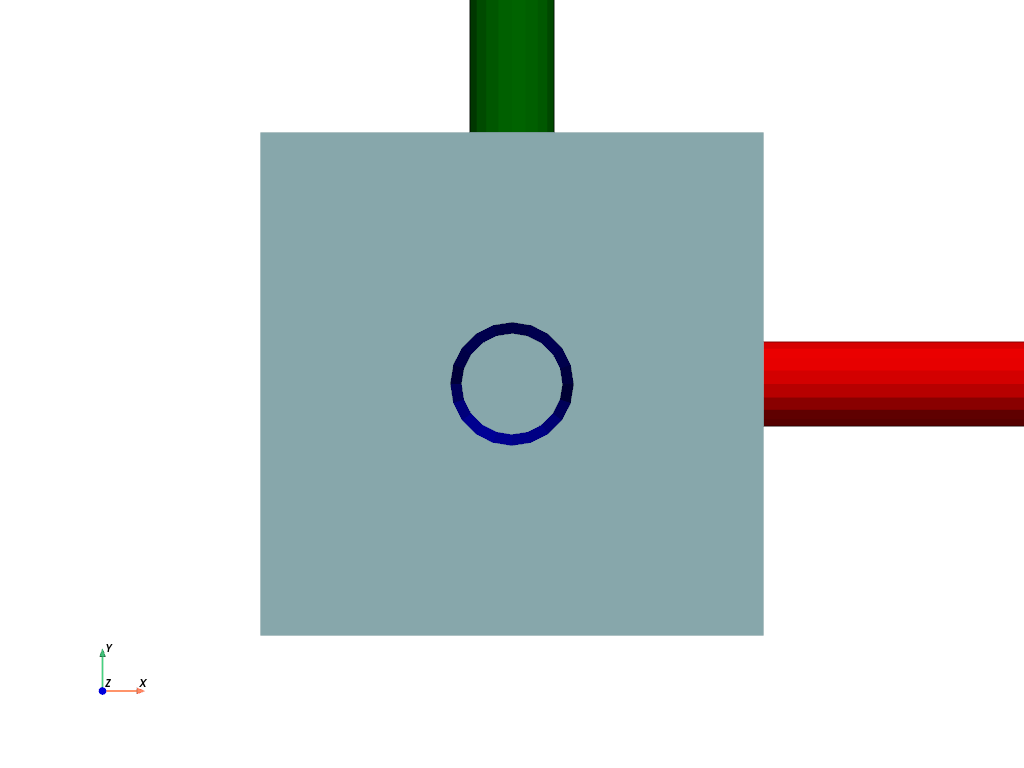

In [14]:
pl.show(jupyter_backend='static')

In [ ]:
# azimuth rotation (about z-axis)
mesh = pv.Cube()
plotter = pv.Plotter(off_screen=True)  # Off-screen rendering
plotter.add_mesh(mesh, color="lightblue", show_edges=False)
plotter.camera_position = 'xy'  # Set static camera view
plotter.add_axes()
origin = [0, 0, 0]  # The origin (0, 0, 0)
l_axis = 5
# Create arrows along the X, Y, and Z axes
x_arrow = pv.Arrow(start=origin, direction=(1, 0, 0), scale=2)  # X axis, scaled by 2
y_arrow = pv.Arrow(start=origin, direction=(0, 1, 0), scale=2)  # Y axis, scaled by 2
z_arrow = pv.Arrow(start=origin, direction=(0, 0, 1), scale=2)  # Z axis, scaled by 2
# Add arrows (axis vectors) to the plot with different colors
plotter.add_mesh(x_arrow, color="red", label="X-axis")
plotter.add_mesh(y_arrow, color="green", label="Y-axis")
plotter.add_mesh(z_arrow, color="blue", label="Z-axis")
plotter.show(jupyter_backend='static')

In [ ]:
# example_meshes = [attr for attr in dir(pv.examples) if callable(getattr(pv.examples, attr))]
# print(example_meshes)
# mesh1 = pv.Cube()

In [ ]:
# Plot original view
# Set up PyVista plotter
plotter = pv.Plotter(off_screen=True)  # Off-screen rendering
plotter.add_mesh(mesh1, color="lightblue", show_edges=False)
# plotter.camera_position = 'xy'  # Set static camera view
plotter.show(jupyter_backend='static')

In [ ]:
# rotate by arbitrary angle 
def random_rotate(mesh):
    """
    Rotate rosette in a random orientation
    TODO:
    - fix bug related to the reliance on model attribute
    """
    rotated = mesh.copy()
    deg_x = np.random.randint(1, 360)
    deg_y = np.random.randint(1, 360)
    deg_z = np.random.randint(1, 360)
    rotated_model = rotated.rotate_x(deg_x, inplace=False)
    rotated_model.rotate_y(deg_y, inplace=True)
    rotated_model.rotate_z(deg_z, inplace=True)
    print(f'x: {deg_x}, y: {deg_y}, z: {deg_z}')
    return rotated_model
mesh2 = random_rotate(mesh1)

# plot
plotter = pv.Plotter(off_screen=True)  # Off-screen rendering
plotter.add_mesh(mesh1, color='red', opacity=0.5)
plotter.add_mesh(mesh2, color="lightblue", show_edges=False)
# plotter.camera_position = 'xy'  # Set static camera view
plotter.show(jupyter_backend='static')

In [ ]:
# rotate again but this time by specified angle of 90 deg
# Define the arbitrary axis of rotation (must be a unit vector)
axis = np.array([0, 0, 1])  # Example: rotation around the diagonal of XY-plane
axis = axis / np.linalg.norm(axis)  # Normalize the axis
# Define the rotation angle (in degrees)
theta = 90  # Rotate theta degrees
# Rotate the mesh
mesh3 = mesh2.rotate_vector(axis, theta, point=(0, 0, 0))  # Rotate about the origin
# plot
plotter = pv.Plotter(off_screen=True)  # Off-screen rendering
# plotter.add_mesh(mesh1, color='red', opacity=0.2)
plotter.add_mesh(mesh2, color='gray', opacity=0.2)
plotter.add_mesh(mesh3, color="lightblue", show_edges=False)
# plotter.add_axes_at_origin()
# plotter.camera_position = 'xy'  # Set static camera view
plotter.show(jupyter_backend='static')